In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

In [6]:

df = pd.read_csv("train.csv")
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

<AxesSubplot:>

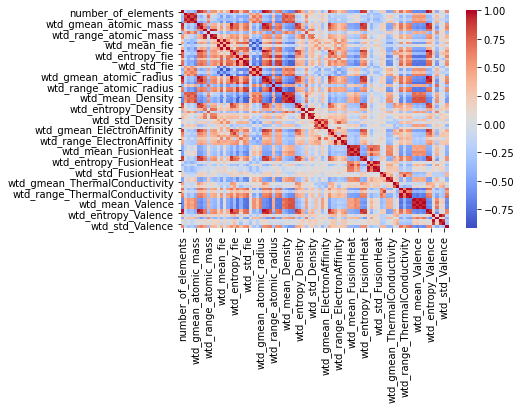

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

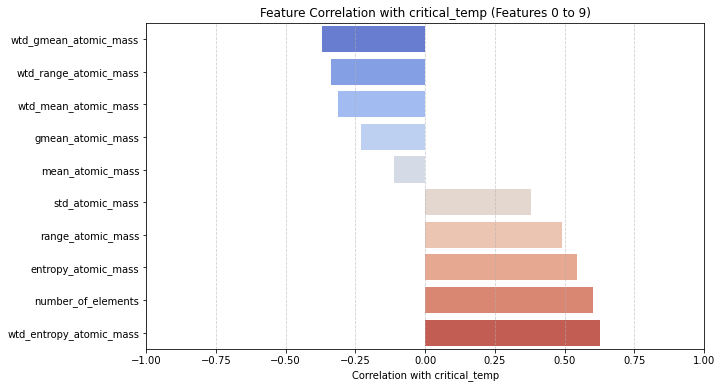

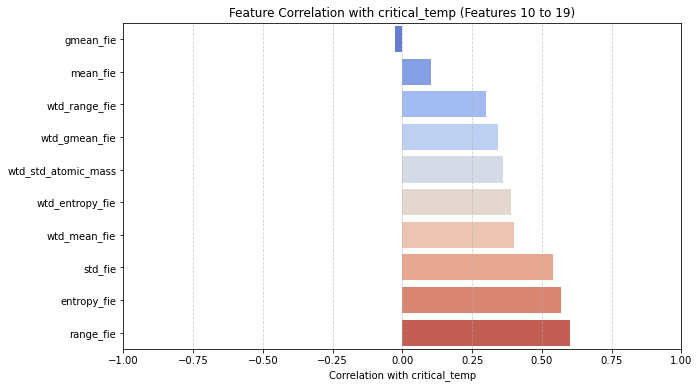

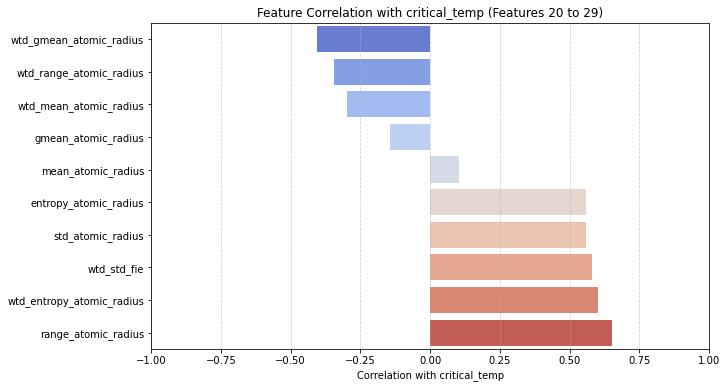

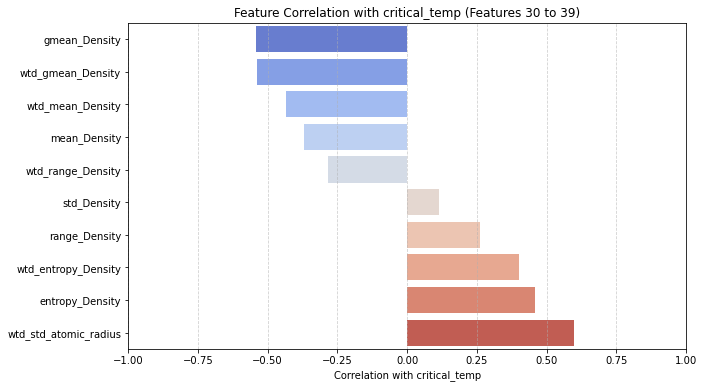

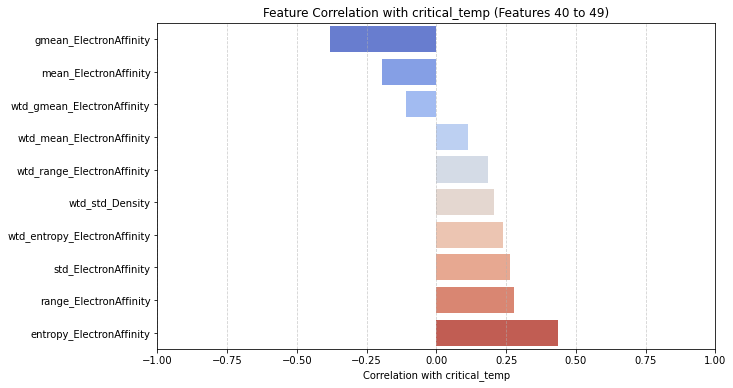

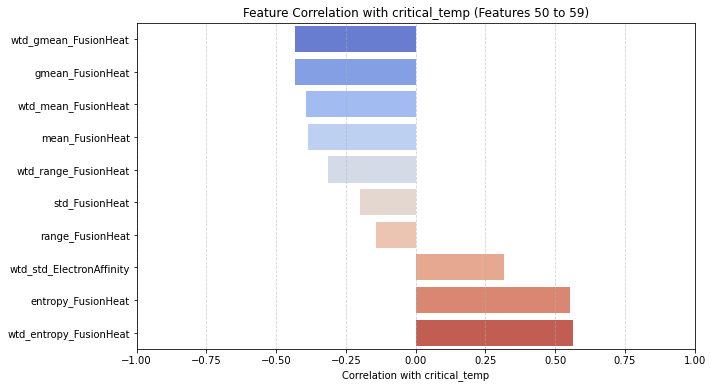

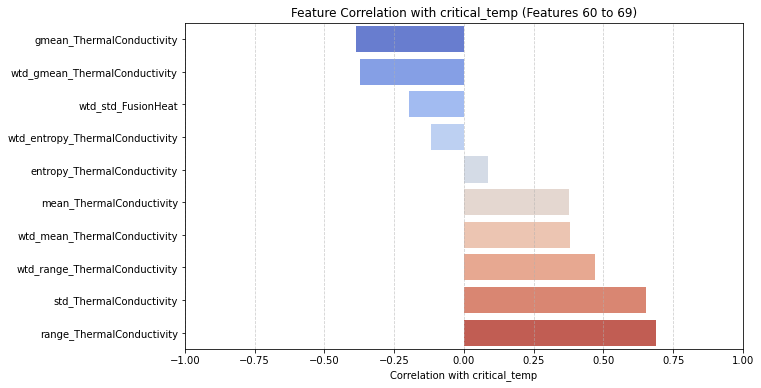

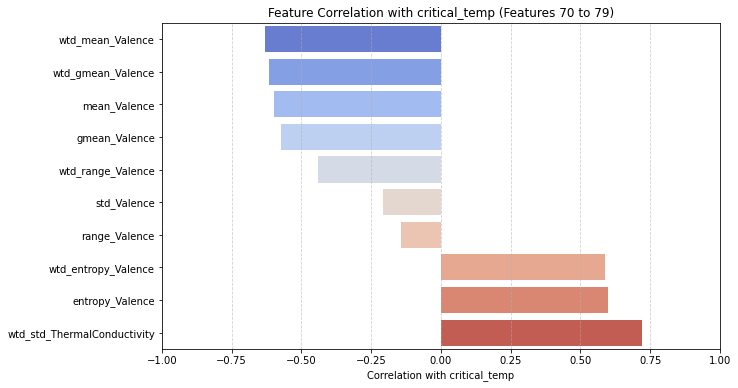

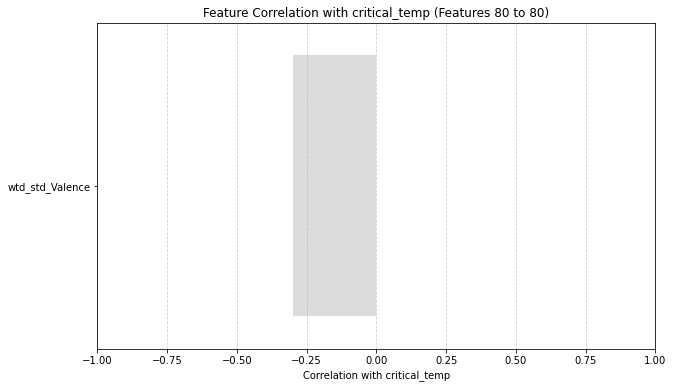

In [24]:
# Compute correlations with the target variable
corr_with_target = df.corr()['critical_temp'].drop('critical_temp')

# Features per plot
features_per_plot = 10
num_features = len(corr_with_target)
num_groups = int(np.ceil(num_features / features_per_plot))

feature_names = corr_with_target.index

for i in range(num_groups):
    start = i * features_per_plot
    end = min(start + features_per_plot, num_features)
    
    subset_features = feature_names[start:end]
    subset_corr = corr_with_target[subset_features].sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=subset_corr.values, y=subset_corr.index, palette='coolwarm')
    plt.xlabel('Correlation with critical_temp')
    plt.title(f'Feature Correlation with critical_temp (Features {start} to {end - 1})')
    plt.xlim(-1, 1)  # correlation range from -1 to 1
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

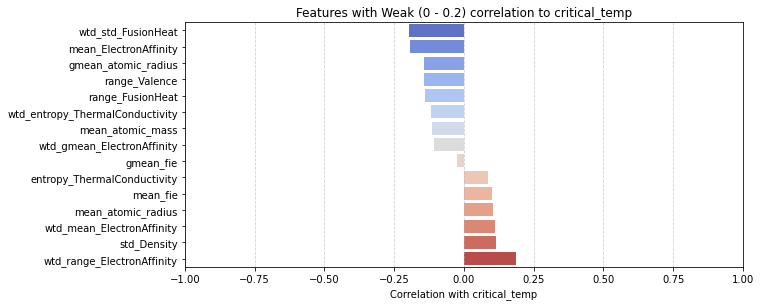

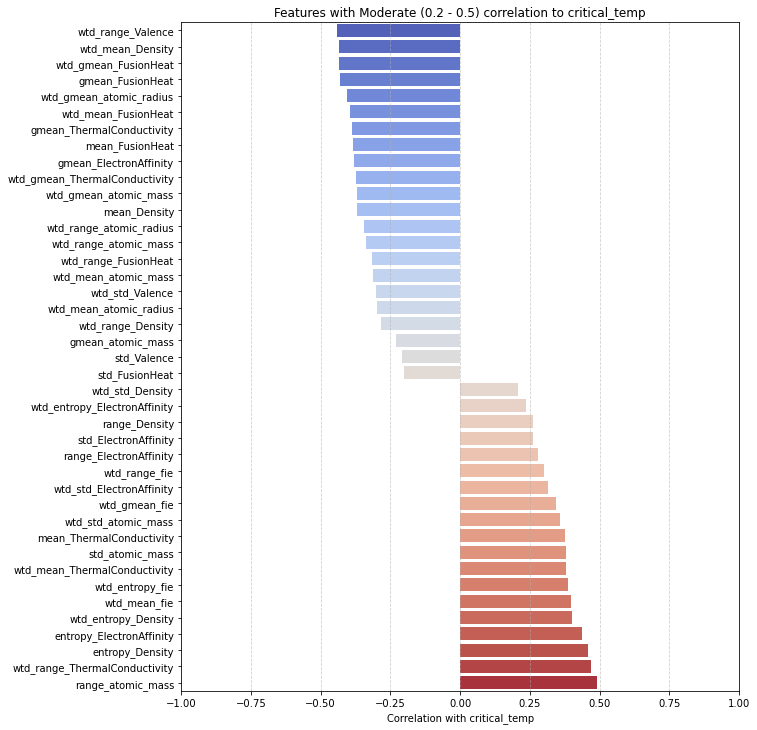

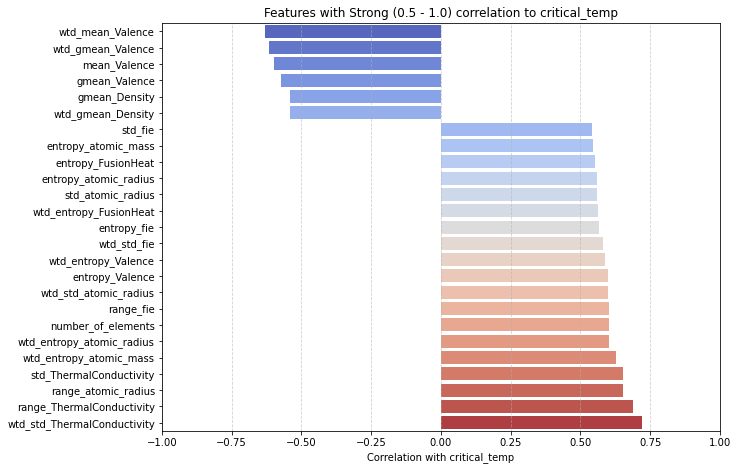

In [25]:
# Correlation with target (absolute values for interval sorting)
corr_with_target = df.corr()['critical_temp'].drop('critical_temp')
abs_corr = corr_with_target.abs()

# Define intervals
intervals = {
    'Weak (0 - 0.2)': (0.0, 0.2),
    'Moderate (0.2 - 0.5)': (0.2, 0.5),
    'Strong (0.5 - 1.0)': (0.5, 1.0)
}

# Plot correlations by interval
for interval_name, (low, high) in intervals.items():
    # Select features within correlation interval
    features_in_interval = corr_with_target[(abs_corr >= low) & (abs_corr < high)].sort_values()
    
    if features_in_interval.empty:
        print(f"No features in {interval_name} correlation interval.")
        continue
    
    plt.figure(figsize=(10, max(4, len(features_in_interval) * 0.3)))
    sns.barplot(x=features_in_interval.values, y=features_in_interval.index, palette='coolwarm')
    plt.xlabel('Correlation with critical_temp')
    plt.title(f'Features with {interval_name} correlation to critical_temp')
    plt.xlim(-1, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

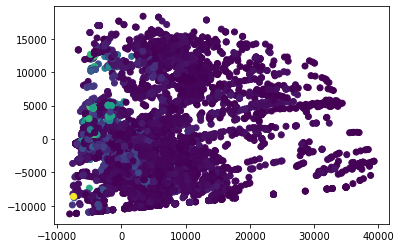

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df.drop('critical_temp', axis=1))
plt.scatter(components[:,0], components[:,1], c=df['critical_temp'], cmap='viridis')


<AxesSubplot:>

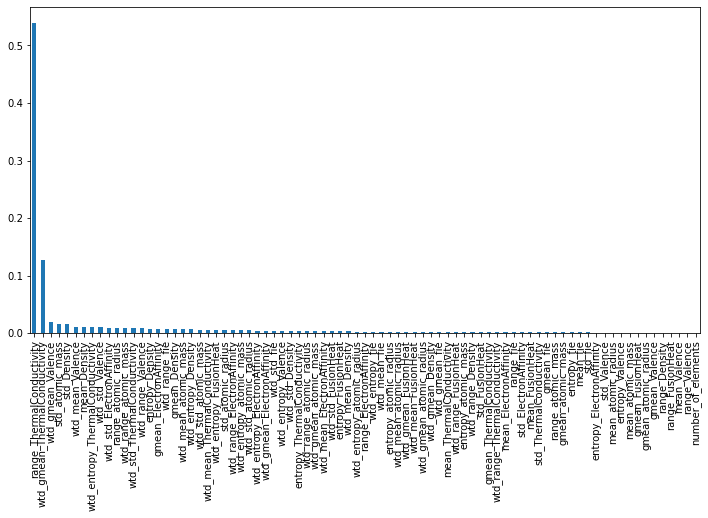

In [18]:
from sklearn.ensemble import RandomForestRegressor
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot.bar(figsize=(12, 6))


In [21]:
from sklearn.feature_selection import RFE
selector = RFE(model, n_features_to_select=20, step=5)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]


<AxesSubplot:>

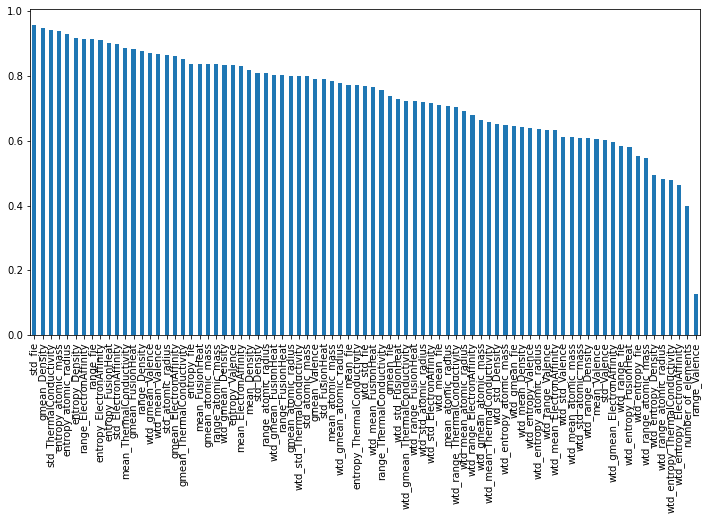

In [22]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
mi_scores.plot.bar(figsize=(12, 6))
